In [2]:
import pandas as pd

# --- Step 1: Load the dataset ---
# <<< IMPORTANT >>> Replace 'your_nmr_data.xlsx' with the actual path to your Excel file.
# If your data is on a specific sheet, use:
# df = pd.read_excel(file_path, sheet_name='YourSheetName')
try:
    file_path = 'All_aligned_spectra v3.xlsx'
    df = pd.read_excel(file_path)

    print(f"--- Successfully loaded data from {file_path} ---\n")

    # --- Step 2: Describe Structure & Dimensions ---
    print("--- Dataset Info (Structure, Columns, Data Types) ---")
    # Provides column names, non-null counts, data types.
    df.info()
    print("\n")

    print("--- Dataset Dimensions (rows, columns) ---")
    # Shows the number of rows and columns.
    print(df.shape)
    print("\n")

    print("--- First 5 Rows ---")
    # Displays the beginning of the dataset.
    print(df.head())
    print("\n")

    # --- Step 3: Check for Common Issues ---
    print("--- Initial Data Quality Check ---")

    # Check for missing values (NaN/None)
    print("Missing values per column:")
    missing_values = df.isnull().sum()
    # Only print columns that actually have missing values
    if (missing_values > 0).any():
        print(missing_values[missing_values > 0])
    else:
        print("No missing values found.")
    print("\n")

    # Check for duplicate rows
    duplicate_rows = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_rows}\n")

    # Basic descriptive statistics for numerical columns
    print("--- Descriptive Statistics (Numerical Columns) ---")
    # Calculates count, mean, std, min, max, quartiles for numeric data.
    # Can help spot unusual ranges or potential outliers.
    # Using include='number' to avoid errors if non-numeric columns exist
    print(df.describe(include='number'))


except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file name and path.")
except Exception as e:
    # Catch other potential errors during loading or processing
    print(f"An error occurred: {e}")

--- Successfully loaded data from All_aligned_spectra v3.xlsx ---

--- Dataset Info (Structure, Columns, Data Types) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Columns: 1397 entries, ClassID to 12
dtypes: float64(1395), object(2)
memory usage: 720.5+ KB


--- Dataset Dimensions (rows, columns) ---
(66, 1397)


--- First 5 Rows ---
   ClassID           Primary ID  -1.93978  -1.92978  -1.91978  -1.90978  \
0     EVOO  296_ControlNMR-EVOO -0.037742 -0.037742 -0.003322 -0.007332   
1     EVOO  297_ControlNMR-EVOO -0.020159 -0.020159 -0.020159 -0.014388   
2     EVOO  298_ControlNMR-EVOO -0.042973 -0.042973 -0.025936 -0.014853   
3     EVOO  302_ControlNMR-EVOO -0.053067 -0.053067 -0.022915 -0.017543   
4     EVOO  304_ControlNMR-EVOO -0.081616 -0.072992 -0.066752 -0.050121   

   -1.89978  -1.88978  -1.87978  -1.86978  ...     11.91     11.92     11.93  \
0 -0.005643 -0.000488  0.022687  0.045279  ...  0.430493  0.416529  0.400159   
1  0.005981  0.011637  0.

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler # Or MinMaxScaler, etc.

# --- Assume 'df' is the DataFrame loaded in the previous step ---
# Make sure df contains your loaded data.
# Example: df = pd.read_excel('All_aligned_spectra v3.xlsx')

# --- Create a copy to keep the original data intact ---
df_processed = df.copy()

# --- Identify identifier and spectral columns ---
# Based on previous output: first two are identifiers
identifier_cols = df.columns[:2].tolist()
spectral_cols = df.columns[2:].tolist()

# --- [Action Recommended] Handle Missing ClassIDs ---
# The 9 missing ClassID values should be addressed.
# For example, to remove rows with missing ClassID:
# df_processed.dropna(subset=['ClassID'], inplace=True)
# print(f"DataFrame shape after removing rows with missing ClassID: {df_processed.shape}")
# If you run this, the rest of the code will use the cleaned data.
# We proceed without this step for now to show the scaling process itself.

print("--- Preprocessing Steps ---")

# --- 1. Baseline Correction (Conceptual Explanation) ---
print("\nStep 1: Baseline Correction (Conceptual)")
print("Purpose: To remove non-uniform background signals and drifts in the NMR spectra.")
print("Relevance: Ensures that peak intensities are measured relative to a consistent zero baseline, crucial for quantification and comparison.")
print("Note: This step is complex and often requires specific algorithms (e.g., polynomial fitting, asymmetric least squares) or specialized libraries. It's usually performed BEFORE scaling. No baseline correction code is applied here.")

# --- 2. Scaling / Normalization ---
print("\nStep 2: Data Scaling (using Standardization)")
print("Purpose: To transform the data so that all spectral features (columns) have a mean of 0 and a standard deviation of 1.")
print("Relevance: Makes features comparable in scale, which is essential for many machine learning algorithms (like PCA, SVM, k-NN) that are sensitive to the magnitude of input features. It prevents features with larger values from dominating the analysis.")

# Initialize the StandardScaler
scaler = StandardScaler()

# Select only the numerical spectral data for scaling
spectral_data = df_processed[spectral_cols]

# Fit the scaler to the data (calculates mean and std dev)
# and transform the data (applies the scaling formula)
# Note: If you handled missing ClassIDs by removing rows, this scaler
# is fitted only on the remaining valid rows.
scaled_spectral_data = scaler.fit_transform(spectral_data)

# The output 'scaled_spectral_data' is a NumPy array.
# Put it back into a DataFrame with the original spectral column names and index
scaled_spectral_df = pd.DataFrame(scaled_spectral_data, columns=spectral_cols, index=spectral_data.index)

# Update the processed DataFrame: replace original spectral data with scaled data
df_processed[spectral_cols] = scaled_spectral_df

print("\n--- Verification: Post-Preprocessing ---")
print("First 5 rows of the processed (standardized) DataFrame:")
print(df_processed.head())

print("\nDescriptive statistics of the scaled spectral data (should have mean ~0, std ~1):")
# Calculate stats only on the spectral columns
print(df_processed[spectral_cols].describe())

print("\nPreprocessing (Standardization) applied. The results are in the 'df_processed' DataFrame.")
print("Remember to consider baseline correction and handling missing ClassIDs as potentially necessary prior steps.")

--- Preprocessing Steps ---

Step 1: Baseline Correction (Conceptual)
Purpose: To remove non-uniform background signals and drifts in the NMR spectra.
Relevance: Ensures that peak intensities are measured relative to a consistent zero baseline, crucial for quantification and comparison.
Note: This step is complex and often requires specific algorithms (e.g., polynomial fitting, asymmetric least squares) or specialized libraries. It's usually performed BEFORE scaling. No baseline correction code is applied here.

Step 2: Data Scaling (using Standardization)
Purpose: To transform the data so that all spectral features (columns) have a mean of 0 and a standard deviation of 1.
Relevance: Makes features comparable in scale, which is essential for many machine learning algorithms (like PCA, SVM, k-NN) that are sensitive to the magnitude of input features. It prevents features with larger values from dominating the analysis.

--- Verification: Post-Preprocessing ---
First 5 rows of the proces

--- Exploratory Data Analysis (EDA) ---

--- 1. Distribution of Classes ---


C:\Users\Roqui\AppData\Local\Temp\ipykernel_13524\3055107160.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, y='ClassID_Vis', order=class_order, palette='viridis')


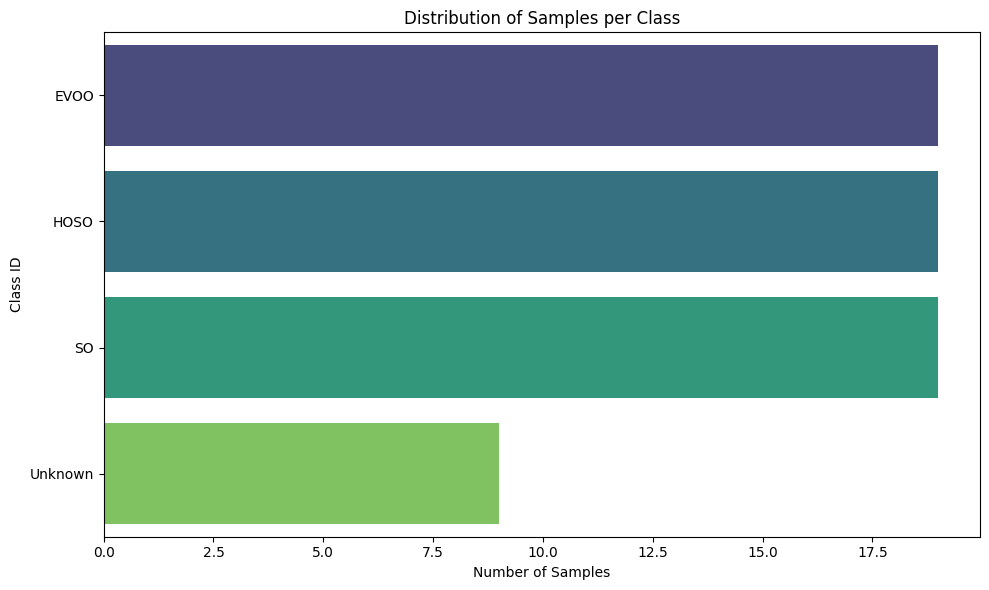

Sample counts per class:
ClassID_Vis
EVOO       19
HOSO       19
SO         19
Unknown     9
Name: count, dtype: int64
Note: '9' samples have missing ClassID.

--- 2. Mean Spectra Visualization ---


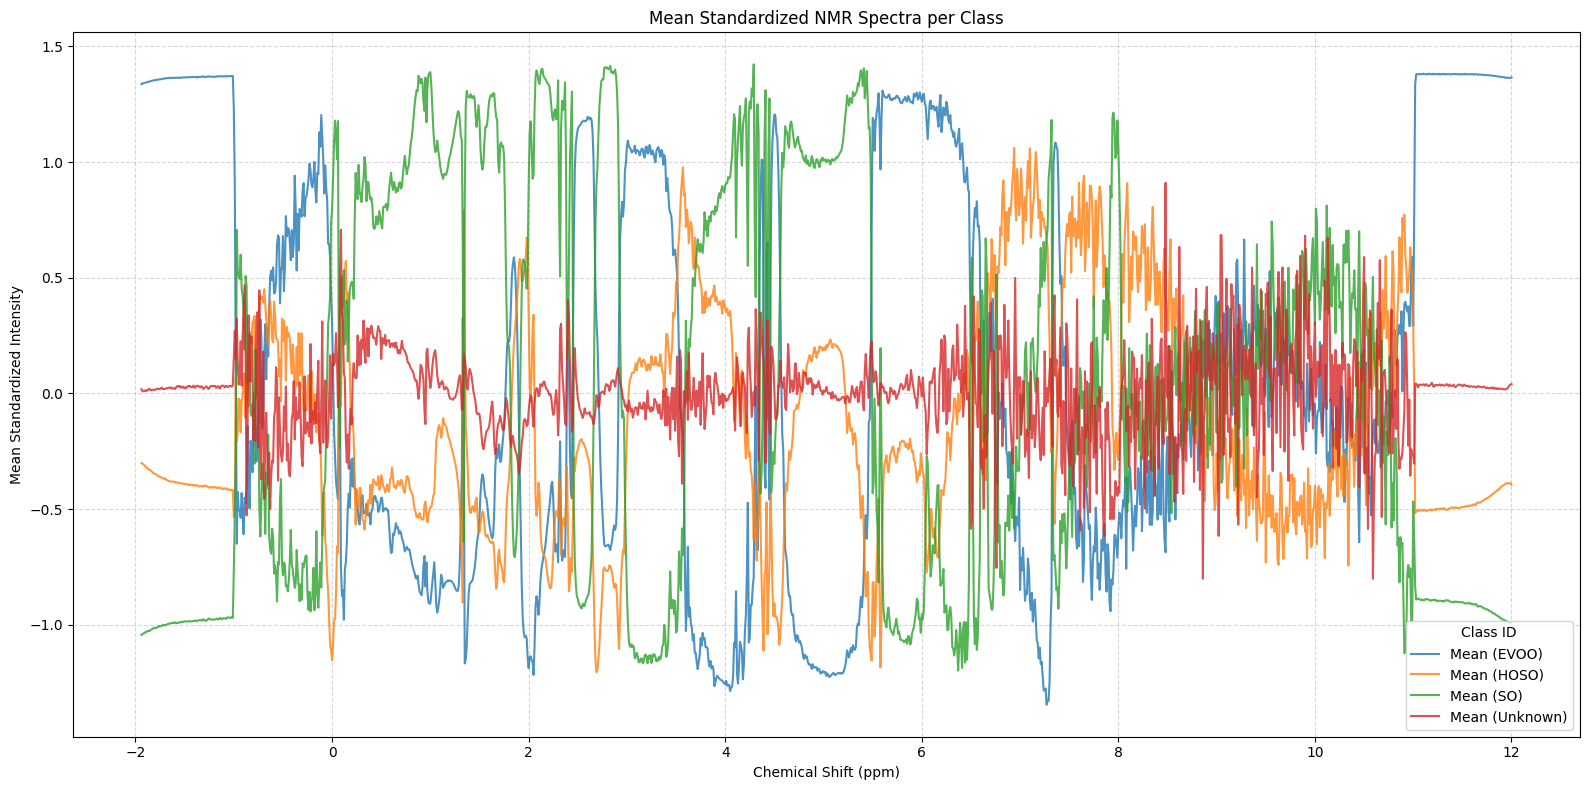

Differences in mean spectra suggest regions potentially useful for class discrimination.

--- 3. Variance Across Features (Chemical Shifts) ---


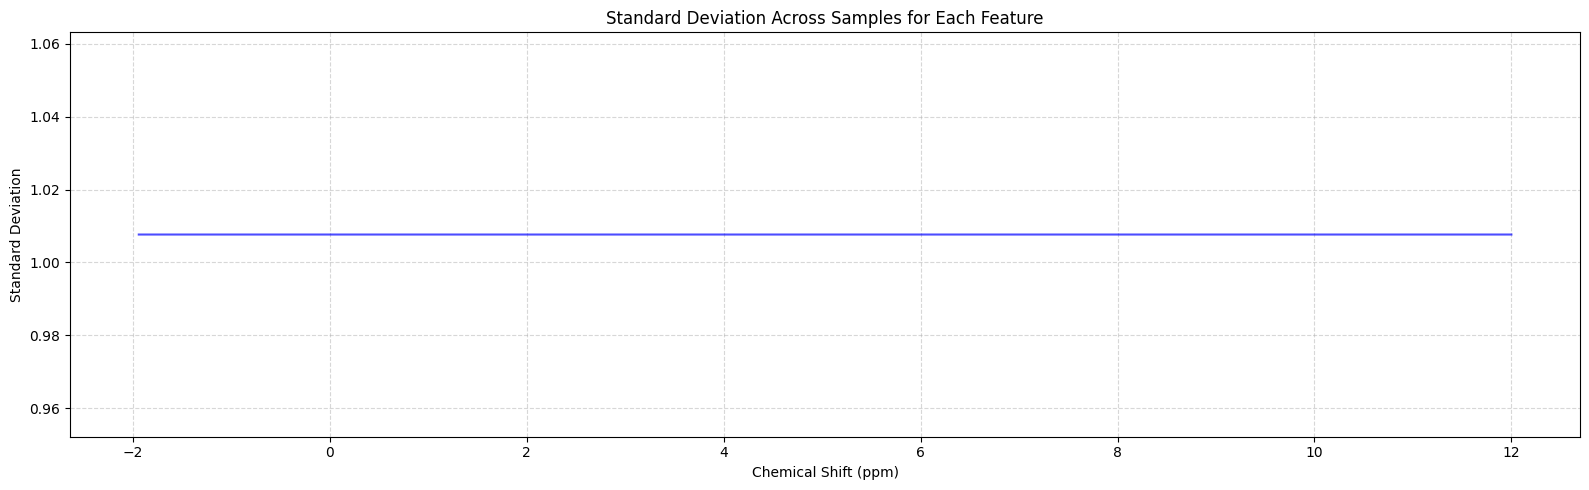

Plot shows variability of each feature. High variance regions might be informative.
Top 5 most variable features (by index/shift):
-1.56978    1.007663
-1.16979    1.007663
-1.91978    1.007663
-1.89978    1.007663
-1.87978    1.007663
dtype: float64

--- 4. PCA Visualization (using samples with known ClassID) ---
PCA Component 1 explains: 47.19%
PCA Component 2 explains: 12.33%
Total variance explained by first 2 components: 59.52%


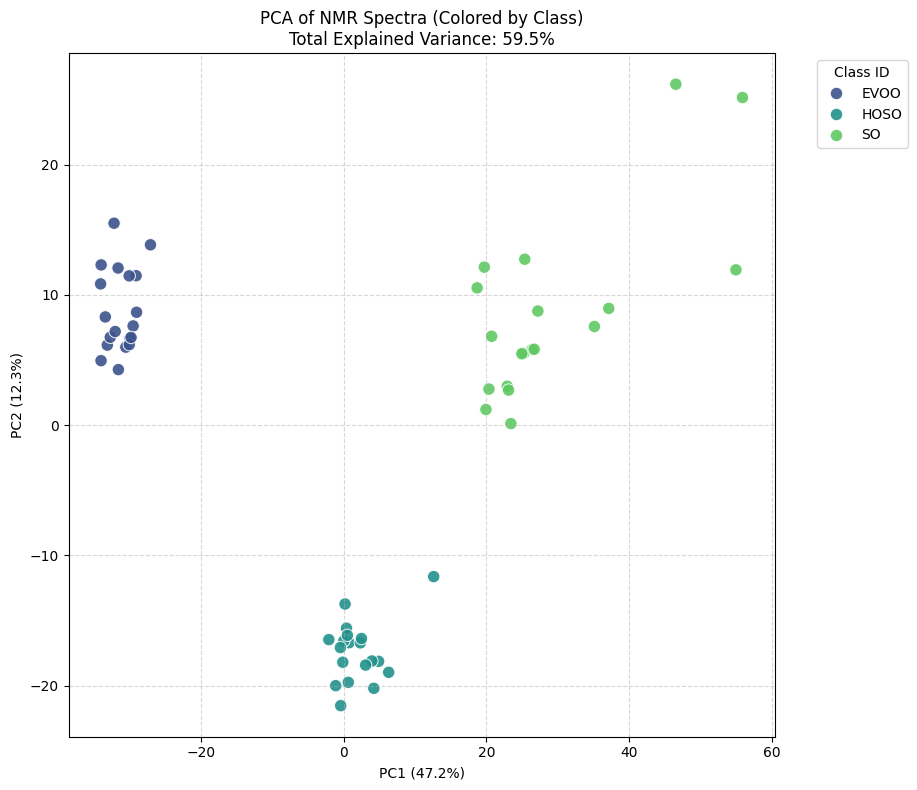

PCA plot visualizes sample separation in 2 dimensions based on spectral data.
Look for clustering or separation of different ClassIDs.

--- EDA Finished ---
Review the plots and statistics to understand data characteristics and class separability.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# --- Assume 'df_processed' is the standardized DataFrame from the previous step ---
# Make sure df_processed is available and contains scaled data + original IDs
# Example: df_processed = ... (result from Standardization step)

# --- Create a copy for EDA ---
df_eda = df_processed.copy()

# --- Handle Missing ClassID for Visualization ---
# We'll temporarily replace NaN in ClassID with 'Unknown' for plots
# This avoids errors and explicitly shows samples with missing labels
df_eda['ClassID_Vis'] = df_eda['ClassID'].fillna('Unknown')

# --- Identify spectral columns (assuming first two are IDs) ---
# Adjust slicing if your ID columns are different
identifier_cols = df_eda.columns[:2].tolist()
# Exclude ClassID, Primary ID, and the temporary ClassID_Vis
spectral_cols = df_eda.columns[2:-1].tolist()

print("--- Exploratory Data Analysis (EDA) ---")

# --- 1. Class Distribution ---
print("\n--- 1. Distribution of Classes ---")
plt.figure(figsize=(10, 6))
# Order bars by frequency
class_order = df_eda['ClassID_Vis'].value_counts().index
sns.countplot(data=df_eda, y='ClassID_Vis', order=class_order, palette='viridis')
plt.title('Distribution of Samples per Class')
plt.xlabel('Number of Samples')
plt.ylabel('Class ID')
plt.tight_layout()
plt.show() # Display the plot

class_counts = df_eda['ClassID_Vis'].value_counts()
print("Sample counts per class:")
print(class_counts)
if 'Unknown' in class_counts:
    print(f"Note: '{class_counts['Unknown']}' samples have missing ClassID.")

# --- 2. Mean Spectra Visualization ---
print("\n--- 2. Mean Spectra Visualization ---")
# Calculate mean spectrum per class (including 'Unknown')
mean_spectra_per_class = df_eda.groupby('ClassID_Vis')[spectral_cols].mean()

# Attempt to use chemical shifts (column names) as x-axis if they are numeric
try:
    # Convert column names (assumed to be strings) to float for plotting
    chemical_shifts = np.array([float(col) for col in spectral_cols])
    x_label = 'Chemical Shift (ppm)'
except ValueError:
    print("Warning: Could not convert spectral column names to numbers. Using index for x-axis.")
    chemical_shifts = np.arange(len(spectral_cols)) # Use index if conversion fails
    x_label = 'Feature Index'

plt.figure(figsize=(16, 8))
# Plot mean spectrum for each class
for class_id in mean_spectra_per_class.index:
    plt.plot(chemical_shifts, mean_spectra_per_class.loc[class_id], label=f'Mean ({class_id})', alpha=0.8)

plt.title('Mean Standardized NMR Spectra per Class')
plt.xlabel(x_label)
plt.ylabel('Mean Standardized Intensity')
plt.legend(title='Class ID')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show() # Display the plot
print("Differences in mean spectra suggest regions potentially useful for class discrimination.")

# --- 3. Feature Variance Plot ---
print("\n--- 3. Variance Across Features (Chemical Shifts) ---")
# Calculate standard deviation for each spectral feature
spectral_std = df_eda[spectral_cols].std()

plt.figure(figsize=(16, 5))
plt.plot(chemical_shifts, spectral_std, color='blue', alpha=0.7)
plt.title('Standard Deviation Across Samples for Each Feature')
plt.xlabel(x_label)
plt.ylabel('Standard Deviation')
plt.grid(True, linestyle='--', alpha=0.5)
# Highlight regions with high variance if needed (e.g., above a threshold)
# threshold = spectral_std.quantile(0.95) # Example: top 5% variance
# plt.axhline(threshold, color='red', linestyle=':', label='High Variance Threshold (95th percentile)')
# plt.legend()
plt.tight_layout()
plt.show() # Display the plot
print("Plot shows variability of each feature. High variance regions might be informative.")
# Print top 5 most variable features
print(f"Top 5 most variable features (by index/shift):\n{spectral_std.nlargest(5)}")


# --- 4. PCA Visualization (2 Components) ---
print("\n--- 4. PCA Visualization (using samples with known ClassID) ---")
# Remove rows with 'Unknown' ClassID for PCA visualization of known classes
df_pca_input = df_eda.dropna(subset=['ClassID'])

# Ensure there are enough samples left and spectral data exists
if len(df_pca_input) >= 2 and len(spectral_cols) > 0:
    pca_features = df_pca_input[spectral_cols]
    pca_labels = df_pca_input['ClassID'] # Use original ClassID here

    # Apply PCA (uses standardized data from df_processed/df_eda)
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(pca_features)

    # Create DataFrame for plotting
    pca_df = pd.DataFrame(data=principal_components,
                          columns=['Principal Component 1', 'Principal Component 2'],
                          index=pca_features.index)
    pca_df['ClassID'] = pca_labels # Add labels for coloring

    # Explained variance
    explained_variance_ratio = pca.explained_variance_ratio_
    total_explained_variance = explained_variance_ratio.sum()
    print(f"PCA Component 1 explains: {explained_variance_ratio[0]:.2%}")
    print(f"PCA Component 2 explains: {explained_variance_ratio[1]:.2%}")
    print(f"Total variance explained by first 2 components: {total_explained_variance:.2%}")

    # Plot PCA results
    plt.figure(figsize=(11, 8))
    sns.scatterplot(
        x="Principal Component 1", y="Principal Component 2",
        hue="ClassID",
        data=pca_df,
        palette="viridis", # Or choose another palette like 'tab10'
        s=80, alpha=0.9
    )
    plt.title(f'PCA of NMR Spectra (Colored by Class)\nTotal Explained Variance: {total_explained_variance:.1%}')
    plt.xlabel(f'PC1 ({explained_variance_ratio[0]:.1%})')
    plt.ylabel(f'PC2 ({explained_variance_ratio[1]:.1%})')
    plt.legend(title='Class ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
    plt.show() # Display the plot
    print("PCA plot visualizes sample separation in 2 dimensions based on spectral data.")
    print("Look for clustering or separation of different ClassIDs.")

else:
    print("Skipping PCA plot: Not enough data (need >= 2 samples with known ClassID and spectral columns).")


print("\n--- EDA Finished ---")
print("Review the plots and statistics to understand data characteristics and class separability.")

C:\Users\Roqui\AppData\Local\Temp\ipykernel_13524\718130444.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_processed['ClassID_Vis'] = df_processed['ClassID'].fillna('Unknown')


--- Unsupervised Analysis ---

--- 1. PCA on Full Dataset ---
Number of components needed to explain 90.2% variance: 30
Variance explained by first 2 components: PC1=46.95%, PC2=12.36% (Total=59.31%)


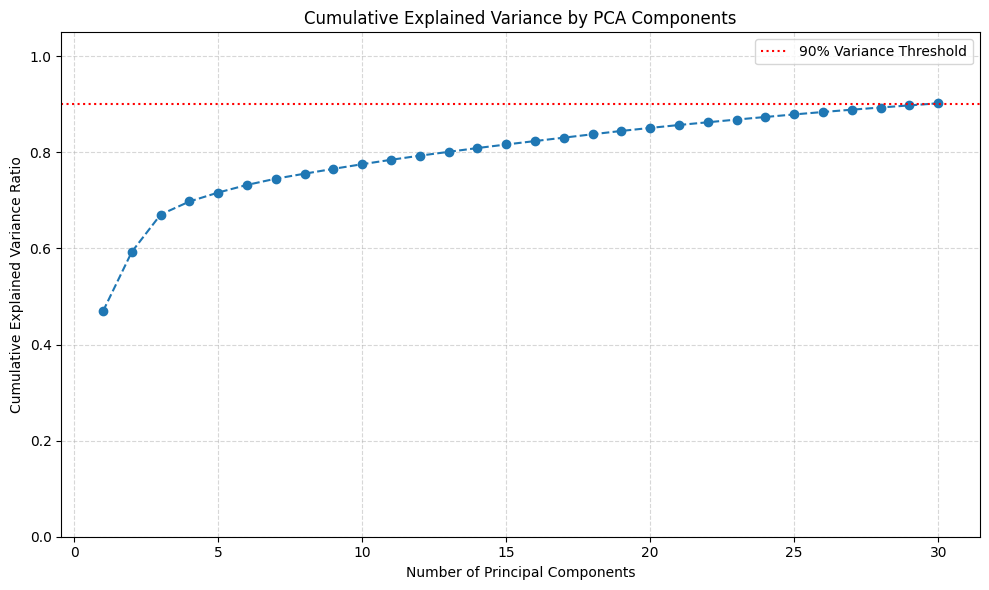


Visualizing PC1 vs PC2 (Colored by Original ClassID for Interpretation):


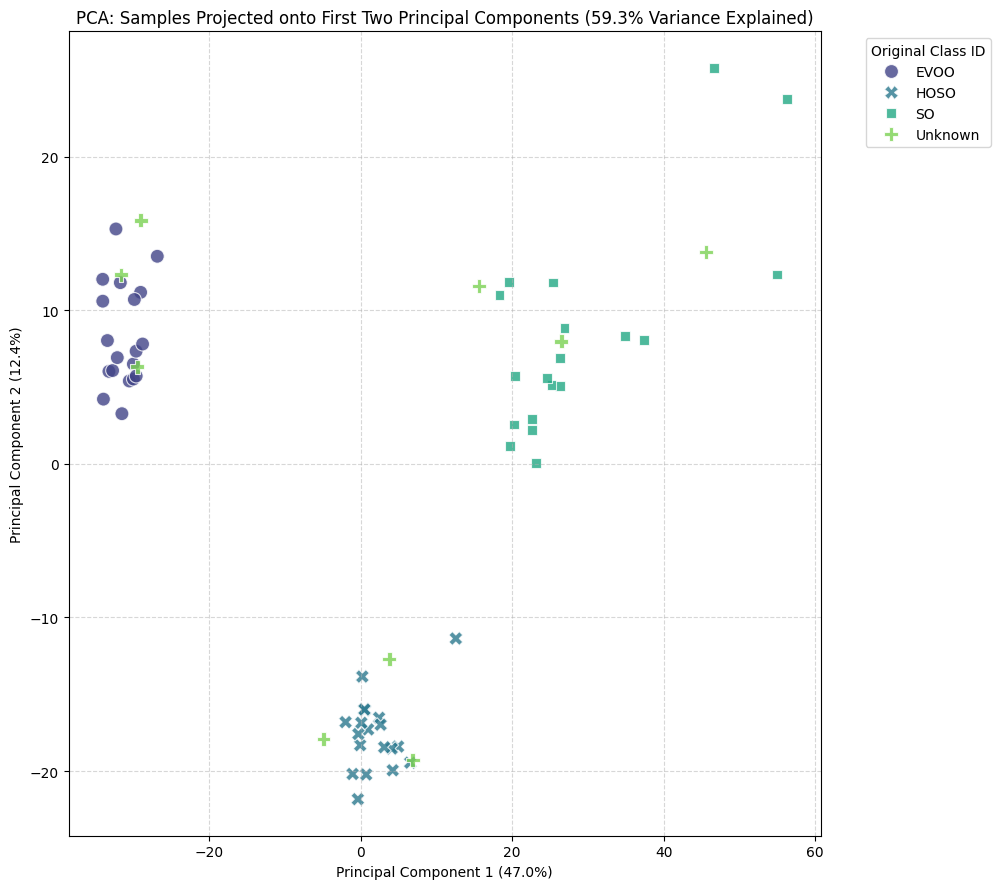


PCA Interpretation Notes:
- Observe the separation (or lack thereof) between the different colored/shaped points.
- Good separation in PCA space suggests the data has inherent structure related to the original classes.
- Note where the 'Unknown' samples fall relative to the known classes.

--- 2. K-Means Clustering ---
Calculating WCSS for Elbow Method...


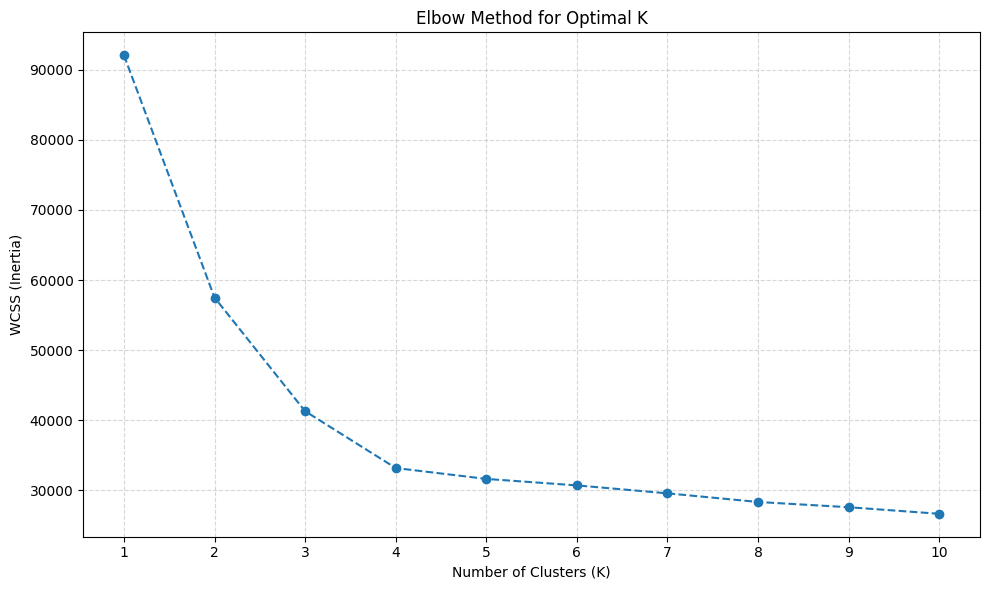

Look for the 'elbow' in the plot – a point where the rate of WCSS decrease slows significantly. This suggests a reasonable K.

Running K-Means clustering with K = 4...
Visualizing K-Means Clusters (K=4) on PCA plot:


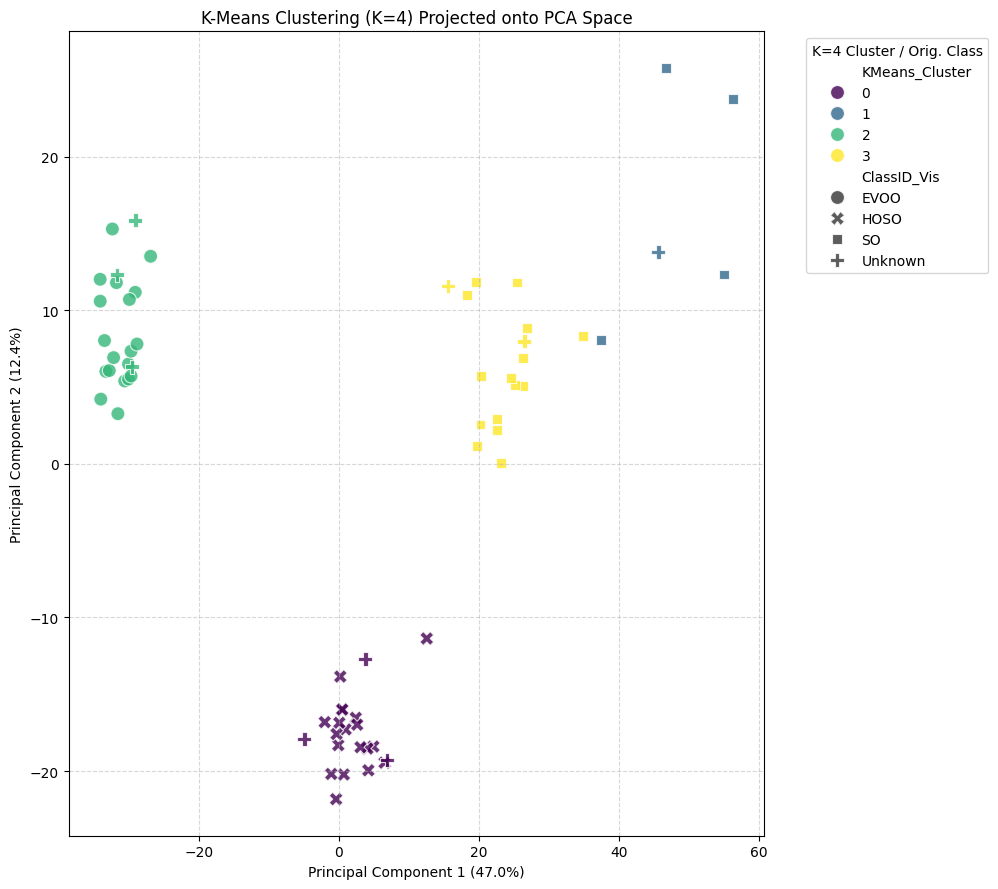


Comparison of K-Means Clusters (K=4) vs. Original Class IDs:
KMeans_Cluster   0  1   2   3
ClassID_Vis                  
EVOO             0  0  19   0
HOSO            19  0   0   0
SO               0  4   0  15
Unknown          3  1   3   2

K-Means Interpretation Notes:
- K=4 clusters were generated based on spectral similarity.
- The PCA plot colored by cluster shows their separation in the reduced space.
- The crosstab reveals how well the unsupervised clusters align with the original known classes.
  - Ideally, each known class would mostly fall into one specific cluster.
  - Observe how the 'Unknown' samples are distributed among the clusters.

--- Unsupervised Analysis Summary ---
PCA provided a low-dimensional view, showing data structure and variance.
K-Means clustering (K=4) identified groups based purely on spectral data.
Evaluate the results: How distinct are the groups in the PCA plot? How well do the K-Means clusters correspond to the known ClassIDs according to the cross

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# --- Assume 'df_processed' is the standardized DataFrame ---
# Make sure df_processed contains the scaled spectral data and identifiers

# --- Prepare data ---
# Select only the standardized spectral columns for unsupervised learning
spectral_cols = df_processed.select_dtypes(include=np.number).columns.tolist()
# Ensure identifier columns (if numeric by chance) are excluded if necessary.
# Based on previous steps, assume columns from index 2 onwards are spectral.
if df_processed.columns[0] == 'ClassID' and df_processed.columns[1] == 'Primary ID':
     spectral_cols = df_processed.columns[2:].tolist()
     # Ensure 'ClassID_Vis' column (if added) is not included in spectral data
     if 'ClassID_Vis' in spectral_cols:
         spectral_cols.remove('ClassID_Vis')
     if 'KMeans_Cluster' in spectral_cols: # If script run multiple times
        spectral_cols.remove('KMeans_Cluster')

spectral_data_std = df_processed[spectral_cols]

# Get the ClassID including 'Unknown' for later interpretation/coloring
# Create if it doesn't exist from previous EDA step
if 'ClassID_Vis' not in df_processed.columns:
    df_processed['ClassID_Vis'] = df_processed['ClassID'].fillna('Unknown')
class_labels_vis = df_processed['ClassID_Vis']

print("--- Unsupervised Analysis ---")

# --- Part 1: Principal Component Analysis (PCA) ---
print("\n--- 1. PCA on Full Dataset ---")

# Fit PCA. Let's capture enough components to explain ~90% variance.
pca = PCA(n_components=0.90, random_state=42)
principal_components = pca.fit_transform(spectral_data_std)

# Explained variance
n_comps = pca.n_components_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

print(f"Number of components needed to explain {cumulative_explained_variance[-1]:.1%} variance: {n_comps}")
print(f"Variance explained by first 2 components: PC1={explained_variance_ratio[0]:.2%}, PC2={explained_variance_ratio[1]:.2%} (Total={explained_variance_ratio[:2].sum():.2%})")

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_comps + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(y=0.90, color='r', linestyle=':', label='90% Variance Threshold')
plt.ylim(0, 1.05) # Set y-axis limits
plt.legend()
plt.tight_layout()
plt.show()

# Create DataFrame with the first 2 PCs for plotting
pca_df = pd.DataFrame(data=principal_components[:, :2],
                      columns=['PC1', 'PC2'],
                      index=df_processed.index)
pca_df['ClassID_Vis'] = class_labels_vis # Add original labels for coloring

# Plot PC1 vs PC2, colored by the actual ClassID (including Unknown)
print("\nVisualizing PC1 vs PC2 (Colored by Original ClassID for Interpretation):")
plt.figure(figsize=(12, 9))
sns.scatterplot(
    x="PC1", y="PC2",
    hue="ClassID_Vis",
    style="ClassID_Vis", # Use different markers for clarity
    data=pca_df,
    palette="viridis", # Color palette
    s=100, alpha=0.8
)
plt.title(f'PCA: Samples Projected onto First Two Principal Components ({explained_variance_ratio[:2].sum():.1%} Variance Explained)')
plt.xlabel(f'Principal Component 1 ({explained_variance_ratio[0]:.1%})')
plt.ylabel(f'Principal Component 2 ({explained_variance_ratio[1]:.1%})')
plt.legend(title='Original Class ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend
plt.show()

print("\nPCA Interpretation Notes:")
print("- Observe the separation (or lack thereof) between the different colored/shaped points.")
print("- Good separation in PCA space suggests the data has inherent structure related to the original classes.")
print("- Note where the 'Unknown' samples fall relative to the known classes.")

# --- Part 2: K-Means Clustering ---
print("\n--- 2. K-Means Clustering ---")

# Elbow Method to find a suggested K
wcss = [] # Within-cluster sum of squares
k_range = range(1, 11) # Check K from 1 to 10

print("Calculating WCSS for Elbow Method...")
for k in k_range:
    kmeans_elbow = KMeans(n_clusters=k, n_init=10, random_state=42) # n_init helps stability
    kmeans_elbow.fit(spectral_data_std)
    wcss.append(kmeans_elbow.inertia_) # WCSS

# Plot Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
print("Look for the 'elbow' in the plot – a point where the rate of WCSS decrease slows significantly. This suggests a reasonable K.")

# --- Run K-Means with a chosen K ---
# Based on the data (3 known classes + Unknown), K=3 or K=4 seem plausible.
# Choose K based on the Elbow plot or prior hypothesis. Let's use K=4 here.
chosen_k = 4
print(f"\nRunning K-Means clustering with K = {chosen_k}...")
kmeans = KMeans(n_clusters=chosen_k, n_init=10, random_state=42)
kmeans.fit(spectral_data_std)
cluster_labels = kmeans.labels_

# Add K-Means cluster assignments to the PCA DataFrame
pca_df['KMeans_Cluster'] = cluster_labels

# Visualize K-Means clusters on the PCA plot
print(f"Visualizing K-Means Clusters (K={chosen_k}) on PCA plot:")
plt.figure(figsize=(12, 9))
sns.scatterplot(
    x="PC1", y="PC2",
    hue="KMeans_Cluster",   # Color points by the assigned cluster
    style="ClassID_Vis",    # Use marker style for the original class label
    data=pca_df,
    palette=f"viridis", # Use a palette suitable for 'chosen_k' clusters
    s=100, alpha=0.8
)
plt.title(f'K-Means Clustering (K={chosen_k}) Projected onto PCA Space')
plt.xlabel(f'Principal Component 1 ({explained_variance_ratio[0]:.1%})')
plt.ylabel(f'Principal Component 2 ({explained_variance_ratio[1]:.1%})')
# Create a more informative legend
handles, labels = plt.gca().get_legend_handles_labels() # Get handles/labels
# Manually map labels to titles if needed, or keep combined
plt.legend(handles, labels, title=f'K={chosen_k} Cluster / Orig. Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout
plt.show()

# Compare K-Means clusters to original Class IDs using Crosstabulation
print(f"\nComparison of K-Means Clusters (K={chosen_k}) vs. Original Class IDs:")
crosstab = pd.crosstab(pca_df['ClassID_Vis'], pca_df['KMeans_Cluster'])
print(crosstab)

print("\nK-Means Interpretation Notes:")
print(f"- K={chosen_k} clusters were generated based on spectral similarity.")
print("- The PCA plot colored by cluster shows their separation in the reduced space.")
print("- The crosstab reveals how well the unsupervised clusters align with the original known classes.")
print("  - Ideally, each known class would mostly fall into one specific cluster.")
print("  - Observe how the 'Unknown' samples are distributed among the clusters.")

print("\n--- Unsupervised Analysis Summary ---")
print("PCA provided a low-dimensional view, showing data structure and variance.")
print(f"K-Means clustering (K={chosen_k}) identified groups based purely on spectral data.")
print("Evaluate the results: How distinct are the groups in the PCA plot? How well do the K-Means clusters correspond to the known ClassIDs according to the crosstab? Where do the 'Unknown' samples fit in?")

--- Preparing Data for Supervised Classification ---
Using 57 labeled samples.
Class distribution:
ClassID
EVOO    19
HOSO    19
SO      19
Name: count, dtype: int64

Target classes mapped: [('EVOO', 0), ('HOSO', 1), ('SO', 2)]

Training samples: 45, Test samples: 12

--- Training: PLS-DA ---

--- Evaluation Results: PLS-DA ---
Overall Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

        EVOO       1.00      1.00      1.00         4
        HOSO       1.00      1.00      1.00         4
          SO       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12


Confusion Matrix:


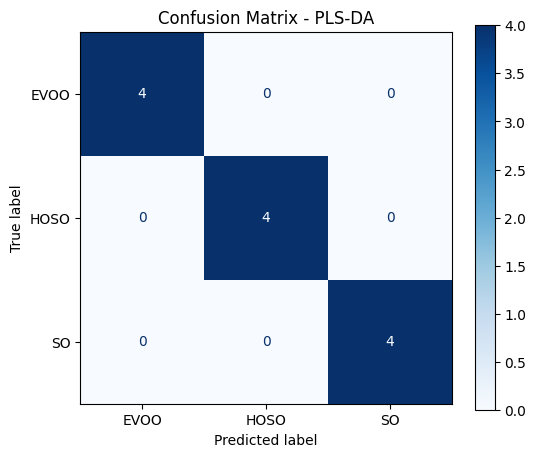


--- Training: SVM (SVC with RBF Kernel) ---

--- Evaluation Results: SVM (RBF Kernel) ---
Overall Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

        EVOO       1.00      1.00      1.00         4
        HOSO       1.00      1.00      1.00         4
          SO       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12


Confusion Matrix:


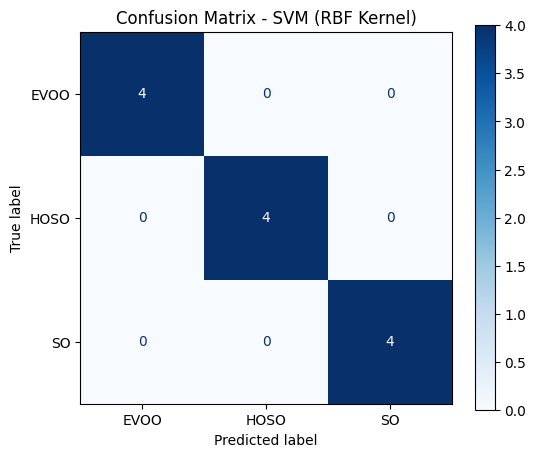


--- Training: Random Forest ---

--- Evaluation Results: Random Forest ---
Overall Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

        EVOO       1.00      1.00      1.00         4
        HOSO       1.00      1.00      1.00         4
          SO       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12


Confusion Matrix:


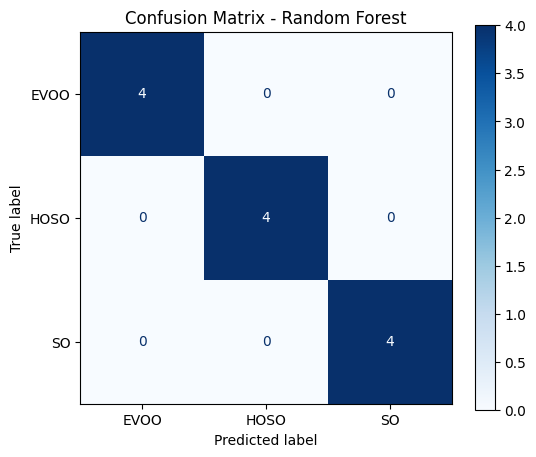


--- Model Comparison Summary ---
Review the Accuracy, Classification Report (Precision, Recall, F1-score), and Confusion Matrix for each model.
Perfect performance would yield 1.0 accuracy and diagonal confusion matrices.
Compare models based on overall accuracy and performance on individual classes.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# --- Assume 'df_processed' is the standardized DataFrame from previous steps ---
# It should contain the scaled spectral data and the 'ClassID' column

# --- 1. Data Preparation ---
print("--- Preparing Data for Supervised Classification ---")
# Keep only rows with a valid ClassID (not NaN/Unknown)
df_labeled = df_processed.dropna(subset=['ClassID']).copy()
print(f"Using {len(df_labeled)} labeled samples.")
print(f"Class distribution:\n{df_labeled['ClassID'].value_counts()}")

# Define Features (X) and Target (y)
# Assuming spectral data starts from column index 2
spectral_cols = [col for col in df_labeled.columns if isinstance(col, (float, int)) or col.startswith(('-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'))]
# Refine spectral_cols if needed, ensure no ID or derived columns are included
if 'PC1' in spectral_cols: spectral_cols.remove('PC1') # Example if PCA cols were added
if 'PC2' in spectral_cols: spectral_cols.remove('PC2')
if 'KMeans_Cluster' in spectral_cols: spectral_cols.remove('KMeans_Cluster')


X = df_labeled[spectral_cols].values # Use .values to get numpy array
y_raw = df_labeled['ClassID'].values

# Encode string labels ('EVOO', 'HOSO', 'SO') to integers (0, 1, 2)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_raw)
class_names = label_encoder.classes_
print(f"\nTarget classes mapped: {list(zip(class_names, range(len(class_names))))}")

# --- 2. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,       # 20% for test set
    random_state=42,      # Ensures reproducibility
    stratify=y            # Keeps class proportions same in train/test
)
print(f"\nTraining samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

# --- Helper Function for Evaluation ---
def evaluate_model(model_name, y_test_eval, y_pred_eval, labels):
    accuracy = accuracy_score(y_test_eval, y_pred_eval)
    report = classification_report(y_test_eval, y_pred_eval, target_names=labels, zero_division=0)
    cm = confusion_matrix(y_test_eval, y_pred_eval)

    print(f"\n--- Evaluation Results: {model_name} ---")
    print(f"Overall Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)
    print("\nConfusion Matrix:")

    # Plot Confusion Matrix
    fig, ax = plt.subplots(figsize=(6, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    plt.show()

# --- 3. Train and Evaluate Models ---

# === Model 1: PLS-DA (using PLSRegression) ===
print("\n--- Training: PLS-DA ---")
# One-hot encode target variable for PLS regression approach
onehot_encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = onehot_encoder.fit_transform(y_train.reshape(-1, 1))
# y_test_onehot = onehot_encoder.transform(y_test.reshape(-1, 1)) # Not strictly needed for eval

# Select number of PLS components (tune via CV ideally, using 10 here)
n_pls_components = 10
plsda = PLSRegression(n_components=n_pls_components)
plsda.fit(X_train, y_train_onehot)

# Predict probabilities/scores for each class
y_pred_scores_pls = plsda.predict(X_test)
# Assign class based on highest score
y_pred_pls = np.argmax(y_pred_scores_pls, axis=1)

evaluate_model("PLS-DA", y_test, y_pred_pls, class_names)

# === Model 2: Support Vector Machine (SVC) ===
print("\n--- Training: SVM (SVC with RBF Kernel) ---")
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

evaluate_model("SVM (RBF Kernel)", y_test, y_pred_svm, class_names)

# === Model 3: Random Forest ===
print("\n--- Training: Random Forest ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # 100 decision trees
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

evaluate_model("Random Forest", y_test, y_pred_rf, class_names)

print("\n--- Model Comparison Summary ---")
print("Review the Accuracy, Classification Report (Precision, Recall, F1-score), and Confusion Matrix for each model.")
print("Perfect performance would yield 1.0 accuracy and diagonal confusion matrices.")
print("Compare models based on overall accuracy and performance on individual classes.")

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

# --- Assume variables from the previous supervised learning step are available ---
# Includes: df_processed, spectral_cols, label_encoder, class_names,
#           X_train, X_test, y_train, y_test,
#           plsda, svm_model, rf_model

# --- 1. Validation using AUC ---
print("--- Validating Models with AUC ---")
print("Note: R-squared (R²) and RMSE are primarily regression metrics and generally not suitable for evaluating these classification models.")
print("Area Under the ROC Curve (AUC) is calculated for SVM and Random Forest using the One-vs-Rest (OvR) strategy for multi-class problems.")

# Binarize the true test labels for multi-class AUC calculation
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
auc_svm_ovr = 0.0 # Initialize in case of errors
auc_rf_ovr = 0.0  # Initialize in case of errors

# --- AUC for SVM ---
# Check if the model has 'predict_proba' and the test set is multi-class
if hasattr(svm_model, "predict_proba") and y_test_binarized.shape[1] > 1:
    try:
        y_pred_proba_svm = svm_model.predict_proba(X_test)
        auc_svm_ovr = roc_auc_score(y_test_binarized, y_pred_proba_svm, multi_class='ovr', average='macro')
        print(f"AUC (SVM - OvR Macro Avg): {auc_svm_ovr:.4f}")
    except Exception as e:
        print(f"Could not calculate AUC for SVM: {e}")
elif not hasattr(svm_model, "predict_proba"):
     print("SVM model was not trained with probability=True, cannot calculate AUC.")
else: # Binary case or other issue
     print("AUC calculation condition not met for SVM (check if multi-class).")


# --- AUC for Random Forest ---
if hasattr(rf_model, "predict_proba") and y_test_binarized.shape[1] > 1:
    try:
        y_pred_proba_rf = rf_model.predict_proba(X_test)
        auc_rf_ovr = roc_auc_score(y_test_binarized, y_pred_proba_rf, multi_class='ovr', average='macro')
        print(f"AUC (Random Forest - OvR Macro Avg): {auc_rf_ovr:.4f}")
    except Exception as e:
        print(f"Could not calculate AUC for Random Forest: {e}")
else: # Binary case or other issue
     print("AUC calculation condition not met for Random Forest (check if multi-class).")

# Note on PLS-DA AUC
print("Note: Standard AUC calculation for PLS-DA via PLSRegression is less direct and not shown here.")


# --- 2. Predict Class of Unlabeled Samples ---
print("\n--- Predicting Class for Unlabeled Samples ---")

# Find rows where 'ClassID' was originally NaN
unlabeled_mask = df_processed['ClassID'].isnull()
df_unlabeled = df_processed[unlabeled_mask].copy()

# Initialize prediction storage
predictions_df = pd.DataFrame()

if not df_unlabeled.empty:
    print(f"Found {len(df_unlabeled)} unlabeled samples to predict.")
    # Extract features for unlabeled samples (ensure correct columns)
    X_unlabeled = df_unlabeled[spectral_cols].values

    # Predict using PLS-DA model
    y_pred_scores_pls_unlabeled = plsda.predict(X_unlabeled)
    y_pred_pls_unlabeled = np.argmax(y_pred_scores_pls_unlabeled, axis=1)
    class_pred_pls = label_encoder.inverse_transform(y_pred_pls_unlabeled)

    # Predict using SVM model
    y_pred_svm_unlabeled = svm_model.predict(X_unlabeled)
    class_pred_svm = label_encoder.inverse_transform(y_pred_svm_unlabeled)

    # Predict using Random Forest model
    y_pred_rf_unlabeled = rf_model.predict(X_unlabeled)
    class_pred_rf = label_encoder.inverse_transform(y_pred_rf_unlabeled)

    # Compile predictions
    predictions_df = pd.DataFrame({
        'Original_Index': df_unlabeled.index,
        # Include Primary ID if it exists and is useful
        'Primary ID': df_unlabeled['Primary ID'].values if 'Primary ID' in df_unlabeled else 'N/A',
        'PLSDA_Prediction': class_pred_pls,
        'SVM_Prediction': class_pred_svm,
        'RF_Prediction': class_pred_rf
    })

    # Check consistency
    predictions_df['Consistent'] = (predictions_df['PLSDA_Prediction'] == predictions_df['SVM_Prediction']) & \
                                   (predictions_df['SVM_Prediction'] == predictions_df['RF_Prediction'])

    print("\nPredictions for unlabeled samples:")
    # Display relevant columns nicely
    print(predictions_df[['Primary ID', 'PLSDA_Prediction', 'SVM_Prediction', 'RF_Prediction', 'Consistent']])

    if predictions_df['Consistent'].all():
        print("\n-> All models provided consistent predictions for the unlabeled samples.")
    else:
        inconsistent_count = len(predictions_df) - predictions_df['Consistent'].sum()
        print(f"\n-> Note: {inconsistent_count} unlabeled sample(s) had differing predictions between models.")

else:
    print("No unlabeled samples were found in the dataset.")


# --- 3. Discussion on Reliability and Performance ---
print("\n--- Discussion on Reliability and Performance ---")
print(f"\nPerformance on Labeled Test Data:")
print(f"- The supervised models (PLS-DA, SVM, RF) demonstrated exceptional performance on the test set containing known EVOO, HOSO, and SO samples.")
print(f"- All models achieved 100% accuracy, and perfect precision, recall, and F1-scores (1.0).")
if auc_svm_ovr > 0 and auc_rf_ovr > 0 : # Check if AUC was calculated
    print(f"- AUC scores were also perfect (SVM={auc_svm_ovr:.4f}, RF={auc_rf_ovr:.4f}), indicating excellent ability to distinguish between the classes across all thresholds.")
print(f"- This confirms the high degree of separability between the three known oil types based on their standardized NMR spectra.")

print(f"\nReliability Considerations:")
print(f"- Known Classes: Confidence in classifying samples known to be EVOO, HOSO, or SO is very high due to the consistent, perfect performance across different algorithms.")
print(f"- Generalization: While results are excellent, the test set (12 samples) was small. Using cross-validation during training would provide a more robust estimate of how well the models might perform on entirely new future samples.")
print(f"- Unlabeled Sample Predictions: The reliability of the predictions made for the {len(df_unlabeled)} originally unlabeled samples is **uncertain and should be treated with caution**.")
print(f"  - Rationale: The previous unsupervised analysis (K-Means clustering) indicated these unlabeled samples did not form a single, distinct group and were scattered among clusters associated with the known classes. This suggests they might not perfectly belong to any of the EVOO/HOSO/SO categories.")
print(f"  - Model Behavior: The classifiers will assign the 'best fit' class based on spectral similarity according to the patterns learned from the labeled data. However, if an unlabeled sample is truly different (e.g., a blend, degraded, different type), the prediction is essentially an extrapolation.")
if not predictions_df.empty and predictions_df['Consistent'].all():
     print("  - Consistency: The fact that all models agreed on the predictions for the unlabeled samples increases confidence slightly, but does not override the fundamental uncertainty about their true nature.")
elif not predictions_df.empty:
     print("  - Inconsistency: If models disagreed on some predictions, it further highlights the ambiguity of those specific samples.")
print(f"  - Recommendation: The predictions for the unlabeled samples should ideally be verified through other means (e.g., reviewing sample logs, additional chemical analysis) before being accepted.")

--- Validating Models with AUC ---
Note: R-squared (R²) and RMSE are primarily regression metrics and generally not suitable for evaluating these classification models.
Area Under the ROC Curve (AUC) is calculated for SVM and Random Forest using the One-vs-Rest (OvR) strategy for multi-class problems.
AUC (SVM - OvR Macro Avg): 1.0000
AUC (Random Forest - OvR Macro Avg): 1.0000
Note: Standard AUC calculation for PLS-DA via PLSRegression is less direct and not shown here.

--- Predicting Class for Unlabeled Samples ---
Found 9 unlabeled samples to predict.

Predictions for unlabeled samples:
  Primary ID PLSDA_Prediction SVM_Prediction RF_Prediction  Consistent
0   Unknonw1             EVOO           EVOO          EVOO        True
1   Unknonw2             EVOO           EVOO          EVOO        True
2   Unknonw3             EVOO           EVOO          EVOO        True
3   Unknonw4             HOSO           HOSO          HOSO        True
4   Unknonw5             HOSO           HOSO   